In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('SalaryData_Train(1).csv')
test = pd.read_csv("SalaryData_Test(1).csv")

In [3]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
from sklearn.preprocessing import LabelEncoder
str_c = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]
number = LabelEncoder()
for i in str_c:
    train[i]= number.fit_transform(train[i])
    test[i]=number.fit_transform(test[i])

In [5]:
train.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K


In [6]:
mapping = {' >50K': 1, ' <=50K': 2}
train = train.replace({'Salary': mapping})
test = test.replace({'Salary': mapping})
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,2
1,50,4,9,13,2,3,0,4,1,0,0,13,37,2
2,38,2,11,9,0,5,1,4,1,0,0,40,37,2
3,53,2,1,7,2,5,0,2,1,0,0,40,37,2
4,28,2,9,13,2,9,5,2,0,0,0,40,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,2
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,2
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,2


In [7]:
df = train.append(test)

/var/folders/db/40qqf4qd6bd3490ndkg1_hww0000gn/T/ipykernel_18769/1858088059.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train.append(test)


In [8]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,2
1,50,4,9,13,2,3,0,4,1,0,0,13,37,2
2,38,2,11,9,0,5,1,4,1,0,0,40,37,2
3,53,2,1,7,2,5,0,2,1,0,0,40,37,2
4,28,2,9,13,2,9,5,2,0,0,0,40,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,2
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,2
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,2
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,2


#### This is the final dataset we would be working on

## EDA

In [9]:
df.shape

(45221, 14)

In [10]:
df.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,2.204507,10.313217,10.118463,2.585148,5.969572,1.412684,3.680281,0.675062,1101.454700,88.548617,40.938038,35.431503,1.752151
std,13.217981,0.958132,3.816992,2.552909,1.500460,4.026444,1.597242,0.832361,0.468357,7506.511295,404.838249,12.007640,5.931380,0.431769
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,28.000000,2.000000,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,2.000000
50%,37.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,2.000000
75%,47.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,2.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000,2.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            45221 non-null  int64
 1   workclass      45221 non-null  int64
 2   education      45221 non-null  int64
 3   educationno    45221 non-null  int64
 4   maritalstatus  45221 non-null  int64
 5   occupation     45221 non-null  int64
 6   relationship   45221 non-null  int64
 7   race           45221 non-null  int64
 8   sex            45221 non-null  int64
 9   capitalgain    45221 non-null  int64
 10  capitalloss    45221 non-null  int64
 11  hoursperweek   45221 non-null  int64
 12  native         45221 non-null  int64
 13  Salary         45221 non-null  int64
dtypes: int64(14)
memory usage: 5.2 MB


In [12]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [13]:
df.duplicated().sum()

5982

In [14]:
df = df.drop_duplicates()

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(39239, 14)

<AxesSubplot:>

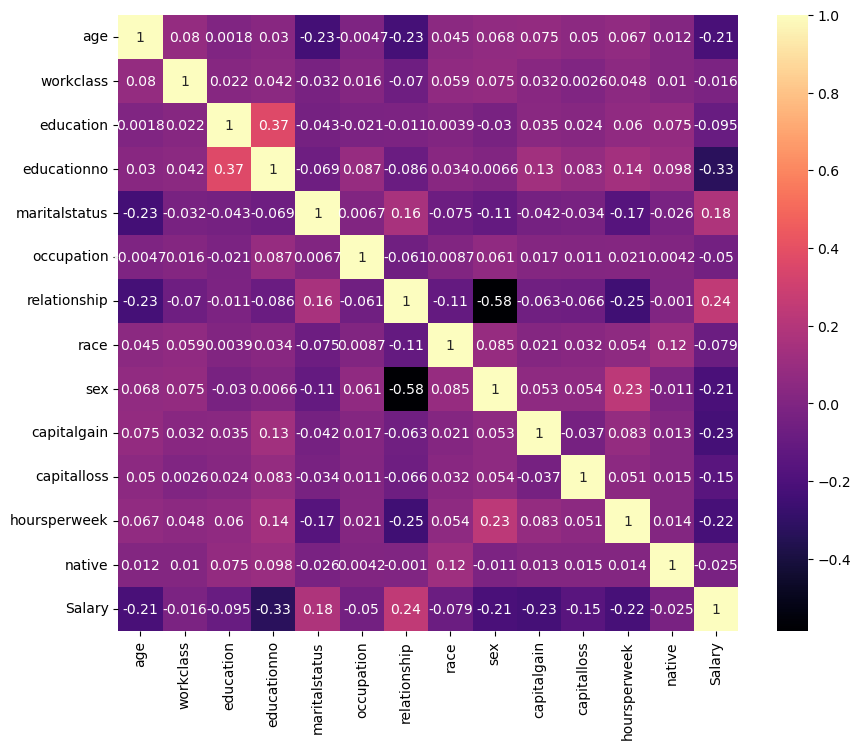

In [17]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='magma')

In [18]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,2
1,50,4,9,13,2,3,0,4,1,0,0,13,37,2
2,38,2,11,9,0,5,1,4,1,0,0,40,37,2
3,53,2,1,7,2,5,0,2,1,0,0,40,37,2
4,28,2,9,13,2,9,5,2,0,0,0,40,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15054,48,1,12,14,0,7,1,4,1,0,0,40,37,2
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,2
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,2
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,2


In [19]:
y = df['Salary']
X = df.drop('Salary',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2)

In [20]:
X_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
13764,38,2,8,11,2,6,0,4,1,0,0,48,37
2911,22,5,15,10,4,0,3,4,0,0,0,40,37
7435,48,4,15,10,4,0,1,4,1,0,0,40,37
29945,31,2,0,6,0,2,1,4,1,0,0,38,37
25503,51,2,11,9,2,2,0,4,1,0,0,20,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4935,39,2,9,13,2,2,0,4,1,15024,0,55,37
4065,44,2,11,9,4,0,3,4,0,0,0,40,37
6871,26,2,15,10,0,0,4,4,0,0,0,38,37
10207,23,2,11,9,0,9,3,4,1,0,0,20,37


### KERNEL - LINEAR

In [21]:
from sklearn.svm import SVC
model1 = SVC(kernel='linear')
model1.fit(X_train,y_train)

SVC(kernel='linear')

In [24]:
pred1 = model1.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred1)

0.7935779816513762

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
accuracy1 = accuracy_score(y_test, pred1)
precision1 = precision_score(y_test, pred1)
recall1 = recall_score(y_test, pred1)
f11 = f1_score(y_test, pred1)
roc_auc1 = roc_auc_score(y_test, pred1)
conf_matrix1 = confusion_matrix(y_test, pred1)

print(f"Accuracy: {accuracy1:.4f}")
print(f"Precision: {precision1:.4f}")
print(f"Recall: {recall1:.4f}")
print(f"F1-Score: {f11:.4f}")
print(f"ROC-AUC: {roc_auc1:.4f}")
print("Confusion Matrix:\n", conf_matrix1)


Accuracy: 0.7936
Precision: 0.6466
Recall: 0.4225
F1-Score: 0.5111
ROC-AUC: 0.6717
Confusion Matrix:
 [[1270 1736]
 [ 694 8072]]


### KERNEL - POLY

In [31]:
model2= SVC(kernel='poly',degree=3)
model2.fit(X_train,y_train)

SVC(kernel='poly')

In [32]:
pred2 = model2.predict(X_test)

In [33]:
pred2

array([2, 2, 2, ..., 2, 2, 2])

In [35]:
accuracy_score(y_test, pred2)

0.7727658851512063

In [36]:
accuracy2 = accuracy_score(y_test, pred2)
precision2 = precision_score(y_test, pred2)
recall2 = recall_score(y_test, pred2)
f12 = f1_score(y_test, pred2)
roc_auc2 = roc_auc_score(y_test, pred2)
conf_matrix2 = confusion_matrix(y_test, pred2)

print(f"Accuracy: {accuracy2:.4f}")
print(f"Precision: {precision2:.4f}")
print(f"Recall: {recall2:.4f}")
print(f"F1-Score: {f12:.4f}")
print(f"ROC-AUC: {roc_auc2:.4f}")
print("Confusion Matrix:\n", conf_matrix2)

Accuracy: 0.7728
Precision: 0.9911
Recall: 0.1111
F1-Score: 0.1998
ROC-AUC: 0.5554
Confusion Matrix:
 [[ 334 2672]
 [   3 8763]]


### KERNEL - SIGMOID

In [37]:
model3 = SVC(kernel='sigmoid')
model3.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [43]:
pred3 = model3.predict(X_test)
pred3
accuracy_score(pred3,y_test)

0.7607883112470268

In [42]:
accuracy3 = accuracy_score(y_test, pred3)
precision3 = precision_score(y_test, pred3)
recall3 = recall_score(y_test, pred3)
f13 = f1_score(y_test, pred3)
roc_auc3 = roc_auc_score(y_test, pred3)
conf_matrix3 = confusion_matrix(y_test, pred3)

print(f"Accuracy: {accuracy3:.4f}")
print(f"Precision: {precision3:.4f}")
print(f"Recall: {recall3:.4f}")
print(f"F1-Score: {f13:.4f}")
print(f"ROC-AUC: {roc_auc3:.4f}")
print("Confusion Matrix:\n", conf_matrix3)

Accuracy: 0.7608
Precision: 0.5584
Recall: 0.3024
F1-Score: 0.3923
ROC-AUC: 0.6102
Confusion Matrix:
 [[ 909 2097]
 [ 719 8047]]


### KERNEL - RBF

In [45]:
model4 = SVC(kernel='rbf')
model4.fit(X_train,y_train)

SVC()

In [47]:
pred4 = model4.predict(X_test)
pred4
accuracy_score(y_test,pred4)

0.7931532449881074

In [48]:
accuracy4 = accuracy_score(y_test, pred4)
precision4 = precision_score(y_test, pred4)
recall4 = recall_score(y_test, pred4)
f14 = f1_score(y_test, pred4)
roc_auc4 = roc_auc_score(y_test, pred4)
conf_matrix4 = confusion_matrix(y_test, pred4)

print(f"Accuracy: {accuracy4:.4f}")
print(f"Precision: {precision4:.4f}")
print(f"Recall: {recall4:.4f}")
print(f"F1-Score: {f14:.4f}")
print(f"ROC-AUC: {roc_auc4:.4f}")
print("Confusion Matrix:\n", conf_matrix4)

Accuracy: 0.7932
Precision: 0.7338
Recall: 0.2981
F1-Score: 0.4239
ROC-AUC: 0.6305
Confusion Matrix:
 [[ 896 2110]
 [ 325 8441]]


In [49]:
metrics_data = {
    "Model": ["Model 1", "Model 2", "Model 3", "Model 4"],
    "Accuracy": [accuracy1, accuracy2, accuracy3, accuracy4],
    "Precision": [precision1, precision2, precision3, precision4],
    "Recall": [recall1, recall2, recall3, recall4],
    "F1-Score": [f11, f12, f13, f14],
    "ROC-AUC": [roc_auc1, roc_auc2, roc_auc3, roc_auc4]
}

adf = pd.DataFrame(metrics_data)

In [51]:
adf.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Model 1,0.793578,0.646640,0.422488,0.511066,0.671659
3,Model 4,0.793153,0.733825,0.298071,0.423941,0.630498
1,Model 2,0.772766,0.991098,0.111111,0.199821,0.555384
2,Model 3,0.760788,0.558354,0.302395,0.392318,0.610187


#### Here we can see Model1-Linear is giving the best accuracy